In [59]:
def count_words(text):
    '''Returns dictionary of unique words and number of times they appear'''
    
    # convert any uppercase letters to lowercase
    text = text.lower()
    
    # remove punctuation
    punctuation = ['.',',','!','?',';',':',"'",'"']
    for c in punctuation:
        text = text.replace(c, '')
    
    # create dictionary of unique words (keys) and their counts (values)
    word_count = {}
    for word in text.split(' '):
        if word in word_count.keys():
            word_count[word] += 1
        else:
            word_count[word] = 1
    
    return word_count

from collections import Counter
import time

def count_words_fast(text):
    '''Returns dictionary of unique words and number of times they appear'''
    text = text.lower()
    punctuation = ['.',',','!','?',';',':',"'",'"']
    
    for c in punctuation:
        text = text.replace(c, '')
    
    word_count = Counter(test.split(' '))
    
    return word_count

In [61]:
def read_book(book_path):
    """Reads a book and returns it as a string"""
    with open(book_path, encoding='utf8') as f:
        text = f.read()
        
    text = text.replace('\n', '').replace('\r', '')
    return text

def word_stats(word_count):
    """Returns (number of unique words, word frequencies)"""
    n_unique = len(word_count) # number of unique words
    counts = word_count.values()
    
    return (n_unique, counts)   

In [68]:
# txt = read_book('./Books/German/shakespeare/Romeo und Julia.txt')
txt = read_book('./Books/English/shakespeare/Romeo and Juliet.txt')

word_counts = count_words(txt)
(n_unique, counts) = word_stats(word_counts)

n_unique

4671

In [108]:
# create list of all the book paths
import os
import pandas as pd

stats = pd.DataFrame(columns = ('language', 'author', 'title', 'length', 'unique'))
n_title = 1

base_dir = './Books'
book_paths = []
for language in os.listdir(base_dir):
    for author in os.listdir(base_dir + '/' + language):
        for title in os.listdir(base_dir + '/' + language + '/' + author):
            current_path = base_dir + '/' + language + '/' + author + '/' + title
            book_paths.append(current_path)
            txt = read_book(current_path)
            (n_unique, counts) = word_stats(count_words(txt))
            stats.loc[n_title] = language, author.capitalize(), title.replace('.txt', ''), sum(counts), n_unique
            n_title += 1

stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5060


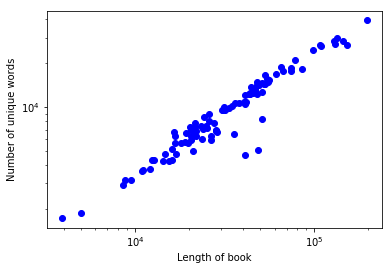

In [94]:
import matplotlib.pyplot as plt

plt.loglog(stats.length, stats.unique, 'bo')
plt.xlabel('Length of book')
plt.ylabel('Number of unique words')
plt.show()

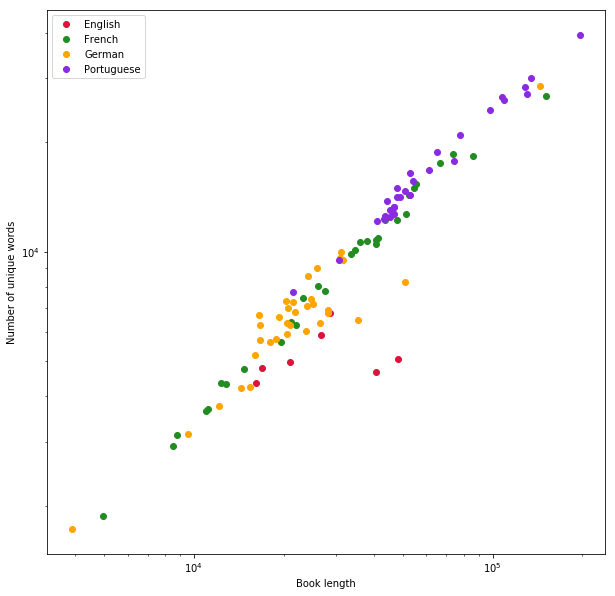

In [104]:
plt.figure(figsize = (10,10))

subset = stats[stats.language == 'English']
plt.loglog(subset.length, subset.unique, 'o', label='English', color='crimson')

subset = stats[stats.language == 'French']
plt.loglog(subset.length, subset.unique, 'o', label='French', color='forestgreen')

subset = stats[stats.language == 'German']
plt.loglog(subset.length, subset.unique, 'o', label='German', color='orange')

subset = stats[stats.language == 'Portuguese']
plt.loglog(subset.length, subset.unique, 'o', label='Portuguese', color='blueviolet')

plt.xlabel('Book length')
plt.ylabel('Number of unique words')
plt.legend()
plt.show()